In [1]:
!pip install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 128.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 90.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 92.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.9/753.9 kB 66.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 27.4 MB/s eta 0:00:00


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [3]:
import re


def remove_special_chars_from_file(filepath='/content/synthetic_data.txt'):
    """
    Loads names from a specified file path and uses Regular Expressions
    to remove all previously inserted special characters.

    Args:
        filepath (str): The full path to the file containing the modified names.

    Returns:
        list: A list of the cleaned names.
    """

    # Define the RegEx Pattern to remove the special characters:
    # ['%', '1', '2', '_', '@', '3', '0', '#', '$', '!', '&']
    pattern_to_remove = r'[%12_@30#$!&]'

    cleaned_names = []

    try:
        # --- 1. Load the words using your specified method ---
        words = open(filepath, 'r').read().splitlines()

        print(f"Total words loaded from '{filepath}': {len(words)}")
        print(f"Length of longest word: {max(len(w) for w in words)}")
        print(f"First 10 words (modified): {words[:10]}\n")

        # --- 2. Process each word/name using re.sub() ---
        for modified_name in words:

            # re.sub(pattern, replacement, string)
            # Replaces any match of the pattern with an empty string ('')
            clean_name = re.sub(pattern_to_remove, '', modified_name)

            cleaned_names.append(clean_name)

    except FileNotFoundError:
        print(f"Error: The file '{filepath}' was not found.")
        return []
    except ValueError as e:
        print(
            f"Error processing word lengths (file might be empty or contain non-text data): {e}")
        return []

    return cleaned_names

# -----------------------
# EXECUTION
# -----------------------


# Run the function with the custom file path
words = remove_special_chars_from_file()

# Print the results
if words:
    print("\n--- Example Cleaned Names (First 20) ---")
    for name in words[:20]:
        print(name)

    # Optional: Save the cleaned data back to a new file
    # with open("cleaned_data.txt", "w") as outfile:
    #     outfile.write('\n'.join(words))
    # print("\nCleaned results saved to 'cleaned_data.txt'")

print(words)

Total words loaded from '/content/synthetic_data.txt': 32033
Length of longest word: 16
First 10 words (modified): ['e$mma', 'o1livia', 'a#va', 'is@abella', 'soph&ia', 'charlot2te', 'mia!', 'amel0ia', 'harper$', 'eve3lyn']


--- Example Cleaned Names (First 20) ---
emma
olivia
ava
isabella
sophia
charlotte
mia
amelia
harper
evelyn
abigail
emily
elizabeth
mila
ella
avery
sofia
camila
aria
scarlett
['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn', 'abigail', 'emily', 'elizabeth', 'mila', 'ella', 'avery', 'sofia', 'camila', 'aria', 'scarlett', 'victoria', 'madison', 'luna', 'grace', 'chloe', 'penelope', 'layla', 'riley', 'zoey', 'nora', 'lily', 'eleanor', 'hannah', 'lillian', 'addison', 'aubrey', 'ellie', 'stella', 'natalie', 'zoe', 'leah', 'hazel', 'violet', 'aurora', 'savannah', 'audrey', 'brooklyn', 'bella', 'claire', 'skylar', 'lucy', 'paisley', 'everly', 'anna', 'caroline', 'nova', 'genesis', 'emilia', 'kennedy', 'samantha', 'maya', 'wi

In [4]:
# build the vocabulary of characters and mapping to/from integers

chars = sorted(list(set(''.join(words))))
stoi = {s: i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i: s for s, i in stoi.items()}
vocab_size = len(itos)
print(itos)
print(vocab_size)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}
27


In [5]:
# shuff up the words
import random
random.seed(42)
random.shuffle(words)

In [6]:
# build the data set
block_size = 8


def build_dataset(words):
    X, Y = [], []
    for w in words:
        context = [0]*block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            # print(''.join(itos[i] for i in context), '----->',itos[ix])
            context = context[1:] + [ix]
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X.to(device), Y.to(device)


n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 8]) torch.Size([182625])
torch.Size([22655, 8]) torch.Size([22655])
torch.Size([22866, 8]) torch.Size([22866])


In [7]:
for x, y in zip(Xtr[:20], Ytr[:20]):
    print(''.join(itos[ix.item()] for ix in x), '----->', itos[y.item()])

........ -----> y
.......y -----> u
......yu -----> h
.....yuh -----> e
....yuhe -----> n
...yuhen -----> g
..yuheng -----> .
........ -----> d
.......d -----> i
......di -----> o
.....dio -----> n
....dion -----> d
...diond -----> r
..diondr -----> e
.diondre -----> .
........ -----> x
.......x -----> a
......xa -----> v
.....xav -----> i
....xavi -----> e


In [8]:
# Copy from the part 3

# ----------------------------------------------

class Linear:
    def __init__(self, fan_in, fan_out, bias=True) -> None:
        self.weight = torch.randn((fan_in, fan_out)) / fan_in**0.5
        self.bias = torch.zeros(fan_out) if bias else None

    def __call__(self, x):
        self.out = x@self.weight
        if self.bias is not None:
            self.out += self.bias
        return self.out

    def parameters(self):
        return [self.weight] + ([] if self.bias is None else [self.bias])

# ----------------------------------------------


class BatchNormld:
    def __init__(self, dim, eps=1e-5, momentum=0.1) -> None:
        self.eps = eps
        self.momentum = momentum
        self.training = True
        # parameters (trained with backprop)
        self.gamma = torch.ones(dim)
        self.beta = torch.zeros(dim)
        # buffers (trained with a running 'momentum update')
        self.running_mean = torch.zeros(dim)
        self.running_var = torch.ones(dim)

    def __call__(self, x):
        # calculate the forward pass
        if self.training:
            if x.ndim == 2:
                dim = 0
            elif x.ndim == 3:
                dim = (0, 1)
            xmean = x.mean(dim, keepdim=True)  # batch mean
            xvar = x.var(dim, keepdim=True)  # batch variance

        else:
            xmean = self.running_mean
            xvar = self.running_var
        # normalize to unit variance
        xhat = (x - xmean) / torch.sqrt(xvar + self.eps)
        self.out = self.gamma * xhat + self.beta
        # update the buffers
        if self.training:
            with torch.no_grad():
                self.running_mean = (1 - self.momentum) * \
                    self.running_mean + self.momentum * xmean
                self.running_var = (1 - self.momentum) * \
                    self.running_var + self.momentum * xvar
        return self.out

    def parameters(self):
        return [self.gamma, self.beta]

# ----------------------------------------------


class Tanh:
    def __call__(self, x):
        self.out = torch.tanh(x)
        return self.out

    def parameters(self):
        return []

# ----------------------------------------------


class Embedding:
    def __init__(self, num_embeddings, embedding_dim) -> None:
        self.weight = torch.randn((num_embeddings, embedding_dim))

    def __call__(self, IX):
        self.out = self.weight[IX]
        return self.out

    def parameters(self):
        return [self.weight]

    # ----------------------------------------------


class FlattenConsecutive:

    def __init__(self, n):
        self.n = n

    def __call__(self, x):
        B, T, C = x.shape
        x = x.view(B, T//self.n, C*self.n)
        if x.shape[1] == 1:
            x = x.squeeze(1)

        self.out = x
        return self.out

    def parameters(self):
        return []
    # ----------------------------------------------


class Sequential:
    def __init__(self, layers) -> None:
        self.layers = layers

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        self.out = x
        return self.out

    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

    def to(self, device):
        for layer in self.layers:
            # For layers with 'weight' and 'bias' attributes (like Linear, Embedding)
            if hasattr(layer, 'weight'):
                layer.weight = layer.weight.to(device)
            if hasattr(layer, 'bias') and layer.bias is not None:
                layer.bias = layer.bias.to(device)
            # For BatchNormld specific parameters and buffers
            if isinstance(layer, BatchNormld):
                layer.gamma = layer.gamma.to(device)
                layer.beta = layer.beta.to(device)
                layer.running_mean = layer.running_mean.to(device)
                layer.running_var = layer.running_var.to(device)
        return self

In [9]:
import mlflow

# Set the MLflow tracking URI (where your experiment runs will be logged)
# For local tracking, you can use a file path:
# mlflow.set_tracking_uri("file:/content/mlruns")

# You can also set up a remote tracking server. For this example, we'll use a local directory.
# If you don't set one, MLflow will create a local 'mlruns' directory.

print(f"MLflow Tracking URI: {mlflow.get_tracking_uri()}")

MLflow Tracking URI: sqlite:///mlflow.db


In [10]:
!pip install wandb

In [11]:
import wandb
from google.colab import userdata

# Log in to W&B using your API key stored in Colab secrets
wandb_api_key = userdata.get('WANDB_API_KEY')
wandb.login(key=wandb_api_key)

# Initialize a new W&B run
# You can customize the project name and other parameters
wandb.init(project="my-ml-experiment", name="initial_run")

# To close the run later, you would call wandb.finish()

/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: dhruvrana4 (dhruvrana4-student) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [12]:
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

In [13]:
# ----------------------------------------------
# n_embd = 24
# n_hidden = 128

# Just to speed up the task
n_embd = 10
n_hidden = 64

model = Sequential([
    Embedding(vocab_size, n_embd),
    FlattenConsecutive(2), Linear(n_embd * 2, n_hidden,
                                  bias=False), BatchNormld(n_hidden), Tanh(),
    FlattenConsecutive(2), Linear(n_hidden * 2, n_hidden,
                                  bias=False), BatchNormld(n_hidden), Tanh(),
    FlattenConsecutive(2), Linear(n_hidden * 2, n_hidden,
                                  bias=False), BatchNormld(n_hidden), Tanh(),
    Linear(n_hidden, vocab_size),
])

model.to(device)

# parameter init
with torch.no_grad():
    # last layer: make less confident
    model.layers[-1].weight *= 0.1


parameters = model.parameters()
print(sum(p.nelement() for p in parameters))
for p in parameters:
    p.requires_grad = True

20073


In [14]:
ix = torch.randint(0, Xtr.shape[0], (4,))
Xb, Yb = Xtr[ix], Ytr[ix]
logits = model(Xb)
print(Xb.shape)
Xb

torch.Size([4, 8])


tensor([[ 0,  0, 24,  1,  9,  4,  5, 14],
        [ 0,  0,  0,  0,  0,  0,  0,  2],
        [ 0,  0,  0,  0,  0, 19,  8, 18],
        [ 0,  0,  0,  5, 13,  9, 12,  9]], device='cuda:0')

In [15]:
for layer in model.layers:
    print(layer.__class__.__name__, ':', tuple(layer.out.shape))

Embedding : (4, 8, 10)
FlattenConsecutive : (4, 4, 20)
Linear : (4, 4, 64)
BatchNormld : (4, 4, 64)
Tanh : (4, 4, 64)
FlattenConsecutive : (4, 2, 128)
Linear : (4, 2, 64)
BatchNormld : (4, 2, 64)
Tanh : (4, 2, 64)
FlattenConsecutive : (4, 128)
Linear : (4, 64)
BatchNormld : (4, 64)
Tanh : (4, 64)
Linear : (4, 27)


In [16]:
model.layers[3].running_mean.shape

torch.Size([1, 1, 64])

In [17]:
max_steps = 200000
batch_size = 32
lossi = []

for i in range(max_steps):

    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (batch_size,), device=device)
    Xb, Yb = Xtr[ix].to(device), Ytr[ix].to(device)

    # forward pass
    logits = model(Xb)

    # Capture embedding_output and logits
    embedding_output = model.layers[0].out # Output of the Embedding layer
    # logits is already captured from the model(Xb) call

    loss = F.cross_entropy(logits, Yb)

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    lr = 0.1 if i < 150000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad

    # track stats and log to W&B
    if i % 10000 == 0:
        print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
        wandb.log({
            "training_loss": loss.item(),
            "embedding_output_mean": embedding_output.mean().item(),
            "embedding_output_std": embedding_output.std().item(),
            "logits_mean": logits.mean().item(),
            "logits_std": logits.std().item()
        }, step=i)

        # Log histograms of model parameters
        for k, p in enumerate(parameters):
            wandb.log({f"hist/param_{k}": wandb.Histogram(p.cpu().detach().numpy())}, step=i)

    lossi.append(loss.log10().item())

      0/ 200000: 3.3038
  10000/ 200000: 1.6907
  20000/ 200000: 2.1455
  30000/ 200000: 2.1295
  40000/ 200000: 2.3044
  50000/ 200000: 2.1124
  60000/ 200000: 2.3924
  70000/ 200000: 1.9783
  80000/ 200000: 2.2107
  90000/ 200000: 2.2970
 100000/ 200000: 2.2699
 110000/ 200000: 2.0830
 120000/ 200000: 1.8226
 130000/ 200000: 1.6314
 140000/ 200000: 1.9467
 150000/ 200000: 1.8506
 160000/ 200000: 2.1233
 170000/ 200000: 2.0456
 180000/ 200000: 2.0422
 190000/ 200000: 1.9092


Learning Rate Decay


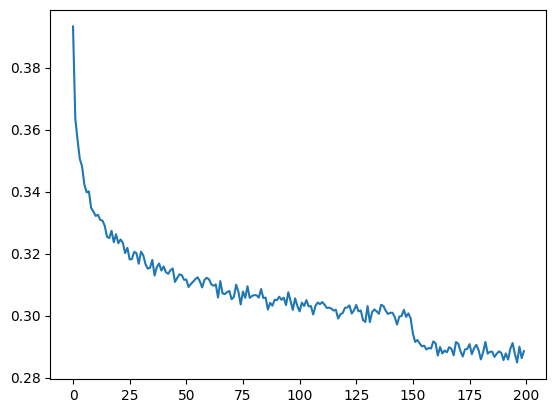

In [18]:
plt.plot(torch.tensor(lossi).view(-1, 1000).mean(1))

In [19]:
for layer in model.layers:
    layer.training = False

In [20]:
@torch.no_grad()  # this decorator disable gradient tracking
def split_loss(split):
    x, y = {
        'train': (Xtr, Ytr),
        'val': (Xdev, Ydev),
        'test': (Xte, Yte),
    }[split]
    logits = model(x.to(device))
    loss = F.cross_entropy(logits, y.to(device))
    print(split, loss.item())


split_loss('train')
split_loss('val')

train 1.9219142198562622
val 2.0262908935546875


In [21]:
# sample from the model

for _ in range(20):

    out = []
    context = [0] * block_size  # initialize with all ...
    while True:
        # forward pass the neural net
        logits = model(torch.tensor([context]).to(device))
        probs = F.softmax(logits, dim=1)
        # sample from the distribution
        ix = torch.multinomial(probs, num_samples=1).item()
        # shift the context window and track the samples
        context = context[1:] + [ix]
        out.append(ix)
        # if we sample the special '.' token, break
        if ix == 0:
            break

    print(''.join(itos[i] for i in out))

tynir.
breky.
jeran.
nalim.
broofyn.
anuston.
elaie.
adolei.
keizusia.
herrah.
ayima.
abdula.
innoket.
jadseed.
tycke.
malisophus.
rubrin.
alahie.
dakari.
jordin.
